## Prediction of benign or malignant cancer tumors

In [1]:
# import basic data science libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load data

df = pd.read_csv('train-data.csv')

#### Going through the data, it is clear that the last ten rows of the dataset were chosen to be test data and stored in 'test-data.csv'. To prevent any form of data leakage, we will remove these rows from our 'training data' and operate only on the first 559 instances. 
#### Generally, this isnt good practice since it is always recommended to shuffle the data before splitting into train and test sets. But for the purpose of this assignment, we will carry on.

In [3]:
df = df.head(559)

### Preliminary data analysis

In [4]:
df.shape

(559, 32)

In [5]:
df.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842934,19.772,11.336,134.599,1096.771,0.067,0.326,0.385,0.221,0.217,...,19.029,202.212,2211.972,0.212,0.737,0.781,0.287,0.466,0.133,M
1,843149,22.601,19.453,145.467,1452.768,0.099,0.052,0.042,0.151,0.191,...,25.600,173.949,2143.103,0.137,0.282,0.311,0.184,0.302,0.196,M
2,84301535,21.507,23.214,142.380,1317.998,0.111,0.266,0.241,0.197,0.166,...,28.073,167.074,1872.370,0.119,0.395,0.459,0.300,0.361,0.126,M
3,84348933,12.505,22.374,85.098,423.055,0.275,0.252,0.280,0.107,0.250,...,28.946,108.286,622.059,0.168,0.971,0.728,0.266,0.737,0.349,M
4,84359034,22.227,15.690,148.024,1420.916,-0.032,0.261,0.230,0.120,0.120,...,18.287,166.754,1725.556,0.161,0.234,0.464,0.336,0.218,0.107,M


In [6]:
# map categorical variable 'diagnosis' into numeric

df.diagnosis = df.diagnosis.map({'M': 1, 'B': 0})

In [7]:
df.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842934,19.772,11.336,134.599,1096.771,0.067,0.326,0.385,0.221,0.217,...,19.029,202.212,2211.972,0.212,0.737,0.781,0.287,0.466,0.133,1
1,843149,22.601,19.453,145.467,1452.768,0.099,0.052,0.042,0.151,0.191,...,25.600,173.949,2143.103,0.137,0.282,0.311,0.184,0.302,0.196,1
2,84301535,21.507,23.214,142.380,1317.998,0.111,0.266,0.241,0.197,0.166,...,28.073,167.074,1872.370,0.119,0.395,0.459,0.300,0.361,0.126,1
3,84348933,12.505,22.374,85.098,423.055,0.275,0.252,0.280,0.107,0.250,...,28.946,108.286,622.059,0.168,0.971,0.728,0.266,0.737,0.349,1
4,84359034,22.227,15.690,148.024,1420.916,-0.032,0.261,0.230,0.120,0.120,...,18.287,166.754,1725.556,0.161,0.234,0.464,0.336,0.218,0.107,1


In [8]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [9]:
# Drop redundant column 'id'

df.drop('id', axis=1, inplace=True)

In [10]:
# Check for NA values

df.isna().any()

radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean             True
compactness_mean            True
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean      True
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                     True
smoothness_se              False
compactness_se             False
concavity_se                True
concave points_se           True
symmetry_se                 True
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst             True
area_worst                  True
smoothness_worst           False
compactness_worst           True
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
diagnosis 

#### We have NA values in our data. Lets see the number of instances of NA values in the data.

In [11]:
df.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            1
compactness_mean           1
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     1
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    1
smoothness_se              0
compactness_se             0
concavity_se               1
concave points_se          1
symmetry_se                1
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            1
area_worst                 1
smoothness_worst           0
compactness_worst          1
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

#### We only have 1 NA value per column in a few columns. If a column had a large number of NA values, dropping it would be the way to go. However in our case, imputing the NA value makes much more sense. 
#### There are a few ways we can do this: forward fill, back fill, mean and median. Forward and backward fills only make sense for chronlogical or time series data. So, we are left with mean and median fill. Lets take a look at the distribution of these features before deciding.

In [12]:
# get the columns which have NA values

columns_with_na = df.columns[df.isna().any()].tolist()
columns_with_na

['smoothness_mean',
 'compactness_mean',
 'fractal_dimension_mean',
 'area_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'perimeter_worst',
 'area_worst',
 'compactness_worst']

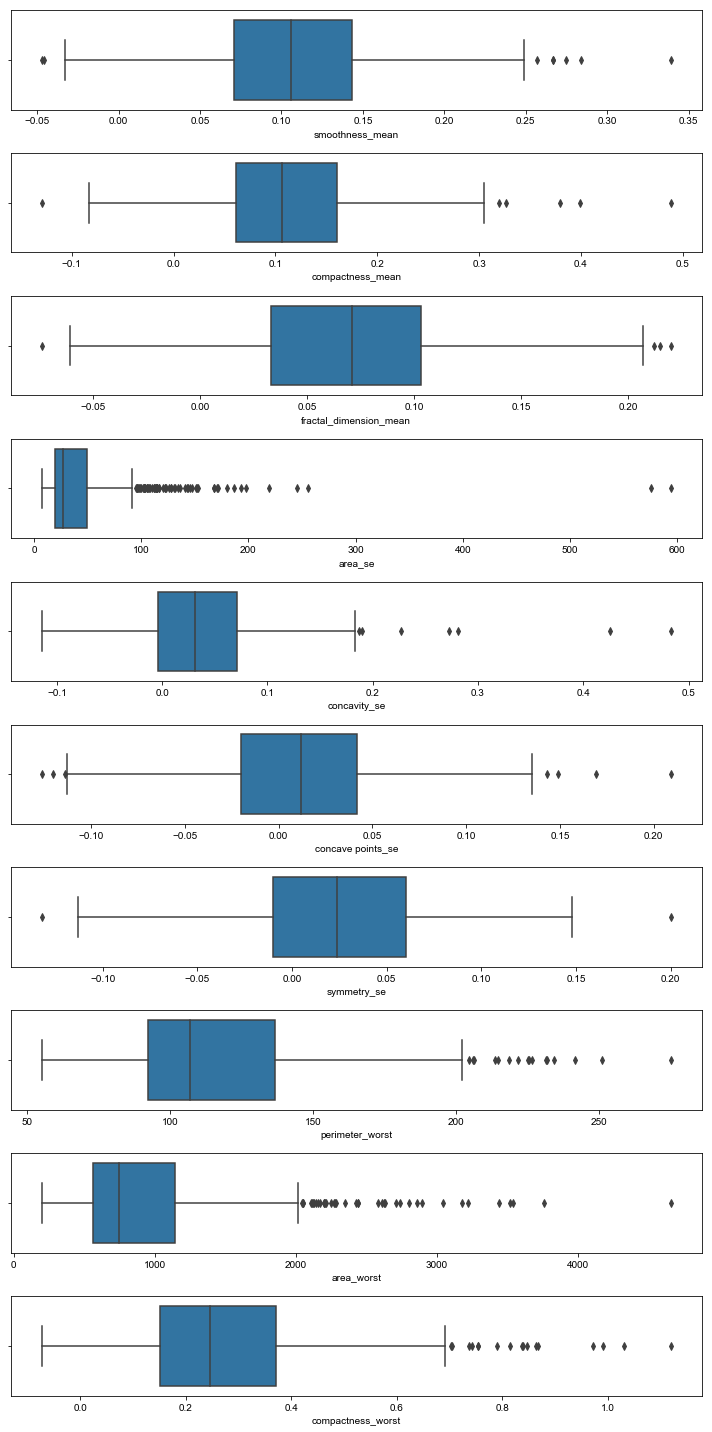

In [13]:
# plot the boxplot of these features to look at theer distributions

fig = plt.figure(figsize=(10,20))

for i, col_name in enumerate(columns_with_na):
    i += 1
    ax = fig.add_subplot(10, 1, i)
    sns.boxplot(df[col_name])

sns.set_style("whitegrid")
fig.tight_layout()
plt.show()    

#### From the boxplots of the distributions, it is clear that almost all of the features have a considerable amount of outliers. Filling in the mean for NA values is not recommended here as the mean is heavily affected by the outliers. Filling in with the median seems like a more sensible option.

In [14]:
# Fill NA values with the respective column's median

for col_name in columns_with_na:
    df[col_name].fillna(df[col_name].median(), inplace=True)

In [15]:
# look at the mean of different features for both the classes to see which features capture the variability

df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,13.322606,19.521363,85.626139,507.905912,0.103484,0.087133,0.048484,0.026674,0.189569,0.071380,...,14.672346,25.629887,95.537218,613.676596,0.134637,0.202380,0.180654,0.085643,0.300232,0.086683
1,19.077762,23.486544,125.996398,1066.287641,0.117374,0.159578,0.172626,0.095092,0.206097,0.067466,...,23.109602,31.940578,154.387631,1553.453374,0.158762,0.404046,0.488165,0.196728,0.349796,0.097951


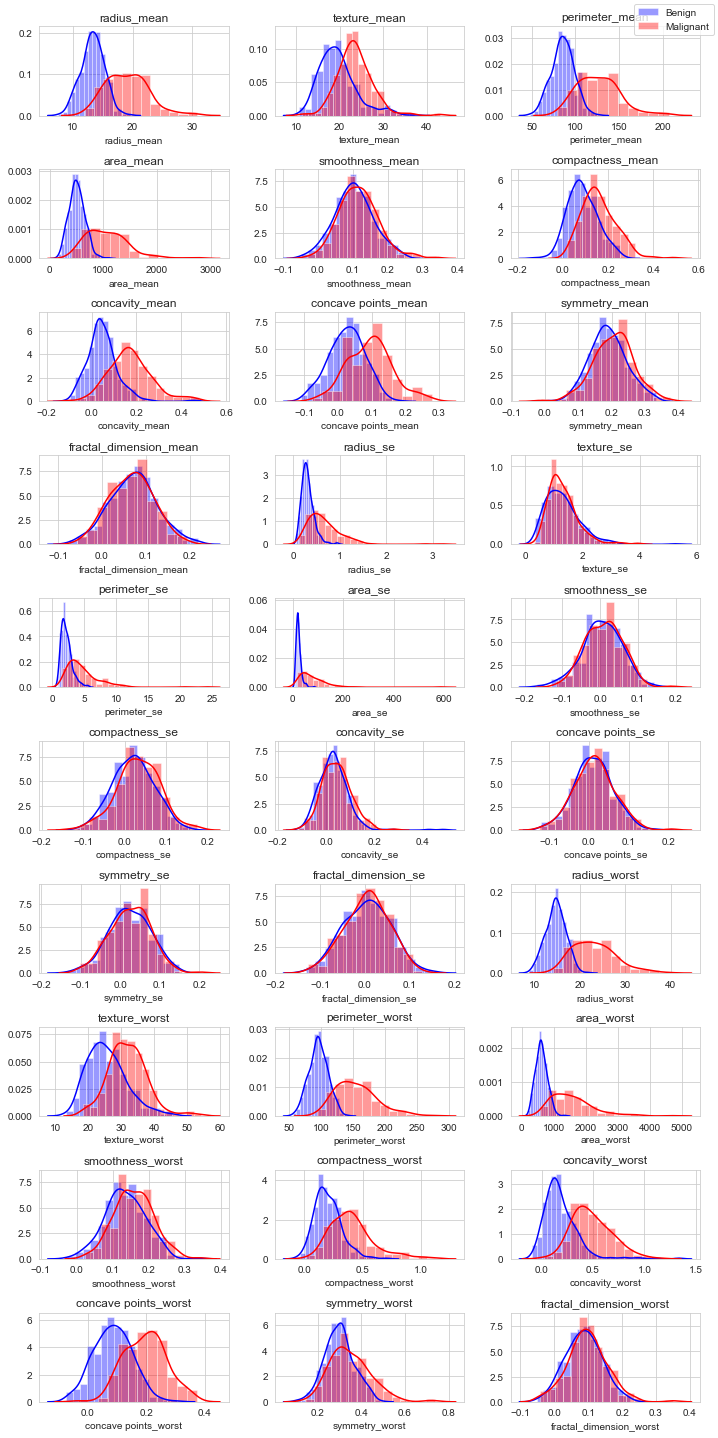

In [16]:
# Plot frequency distributions of the features to visualize which features capture the most variability

df_benign = df[df['diagnosis'] == 0]
df_malignant = df[df['diagnosis'] == 1]

fig = plt.figure(figsize=(10,20))
for i,col_name in enumerate(list(df.columns[0:30])):
    i +=1
    ax = fig.add_subplot(10,3,i)
    sns.distplot(df_benign[col_name], label = 'Benign', kde = True, color= 'b')
    sns.distplot(df_malignant[col_name], label= 'Malignant', kde = True, color= 'r')
    ax.set_title(col_name)

sns.set_style("whitegrid")
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

#### Looking at these distributions it is clear that some features including fractal_dimension_worst, fractal_dimension_mean and smoothness_mean etc. are not differently distributed for both the 'malignant' and 'benign' classes. This means that including these features in our predictive modelling algorithm would not significantly improve its performance (They could even hamper the performance due to undue interaction effects).

#### For now, let us feed all the features into our predictive model. Instead of relying on visual inspection, later we will use sophiscticated techniques like feature selection (selecting the most important features) and feature extraction (PCA) to reduce the dimensions of our data and see if they improve the performance.

In [17]:
# import required machine learning libraries

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
# split our data into training and validation sets (since we already have a separate test set)

X_train, X_val, y_train, y_val = train_test_split(df.iloc[:,:-1], df['diagnosis'], train_size=0.8, test_size=0.2,
                                                  random_state=120)

#### Let us look at the distribution of classes in our dataset and also apply a dummy classifier to give us a baseline

In [19]:
# percentages of benign and malignant instances in our data

df['diagnosis'].value_counts(normalize=True) * 100

0    63.148479
1    36.851521
Name: diagnosis, dtype: float64

In [20]:
# dummy classifier

from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

0.6785714285714286

#### We have 67.85% benign instances and 32.15% malignant instances. A dummy classifier which always pick the most frequent class has a validation accuracy of 0.678. This is our baseline and we hope any machine learning algorithm we pick performs significantly better than the baseline.

In [21]:
# Normalize the featues

from sklearn.preprocessing import Normalizer

norm = Normalizer()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_val_norm = norm.transform(X_val)

#### Ensemble methods like Gradient Boosting Decision Tree and Random Forest Classifiers are almost certain to give the best results out of all machine learning algorithms. 
#### Instead of relying on just tree-based algorithms, let use throw in linear classifiers like Logistic Regression and Linear Discriminant Analysis and even SVMs for good measure, and because our dataset is small.

In [22]:
SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid'], 'gamma':['auto']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100], 'solver':['liblinear']}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
RF_params = {'n_estimators':[10,50,100], 'random_state':[42]}
GBC_params = {'n_estimators':[10, 50, 100], 'random_state':[42]}

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))
models_opt.append(('GBC', GradientBoostingClassifier(), GBC_params))

results = []
names = []

for name, model, params in models_opt:
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    model_grid = GridSearchCV(model, params, cv=5, iid=True)
    cv_results = cross_val_score(model_grid, X_train_norm, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "Cross Validation Accuracy {} Accarcy: {} SD: {}".format(name, cv_results.mean(), cv_results.std())
    print(msg)

Cross Validation Accuracy LR Accarcy: 0.9083645443196003 SD: 0.020108790603446586
Cross Validation Accuracy LDA Accarcy: 0.9328339575530586 SD: 0.024709767591869027
Cross Validation Accuracy RFC Accarcy: 0.94187265917603 SD: 0.028667236347817576
Cross Validation Accuracy SVM Accarcy: 0.9106117353308363 SD: 0.018204969921156756
Cross Validation Accuracy GBC Accarcy: 0.9374282147315857 SD: 0.02500938023931507


#### As anticipated, Random Forest and Gradient Boosting Decision Tree gave the highest accuracies, although Linear Discrimant came very close. Let us plot the distribution of accuracies of these models for better comparison.

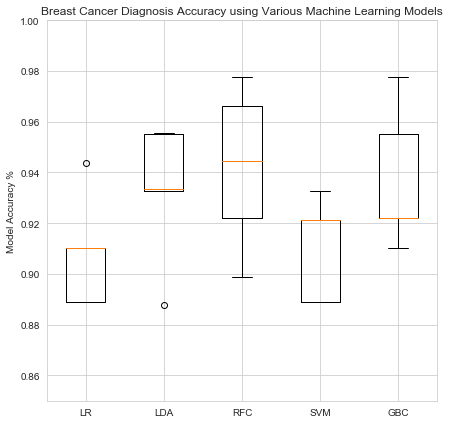

In [23]:
fig = plt.figure(figsize=(7,7))
plt.boxplot(results, labels = names)
plt.title('Breast Cancer Diagnosis Accuracy using Various Machine Learning Models')
plt.ylabel('Model Accuracy %')
sns.set_style("whitegrid")
plt.ylim(0.85,1)
plt.show()

#### Analogous to the principle of beam search, let us stick with the three best algorithms, LDA, RFC and GBC and tune these models further and pick the one which gives the highest accuracy after tuning.

In [24]:
# Instantiate a new LDA model and check its performance

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_norm, y_train)
lda_predicted = lda.predict(X_val_norm)

print('LDA Accuracy is: {}'.format(accuracy_score(y_val,lda_predicted)))

print('LDA Classification Report')
print(classification_report(y_val, lda_predicted))

LDA Accuracy is: 0.9642857142857143
LDA Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.92      0.97      0.95        36

   micro avg       0.96      0.96      0.96       112
   macro avg       0.95      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



In [25]:
confusion_matrix_lda = pd.DataFrame(confusion_matrix(y_val, lda_predicted), index = ['Actual Negative','Actual Positive'], columns = ['Predicted Negative','Predicted Postive'] )
confusion_matrix_lda

,Predicted Negative,Predicted Postive
Actual Negative,73,3
Actual Positive,1,35


#### The confusion matrix shows that the LDA model has misclassified only 4 instances in the validation set.

In [26]:
# Instantiate a new RFC model and check its performance

RF_params = {'n_estimators':[10, 50, 100, 200]}
rfc = RandomForestClassifier(random_state=42)

# Instantiate gridsearch using RFC model and search for the best parameters
rfc_grid = GridSearchCV(rfc, RF_params, cv=3, iid=True)

# Fit model to training data
rfc_grid.fit(X_train_norm, y_train)

print('Optimized number of estimators: {}'.format(rfc_grid.best_params_.values()))

# Instantiate RFC with optimal parameters
rfc_best = RandomForestClassifier(**rfc_grid.best_params_, random_state=42)

# Fit RFC to training data
rfc_best.fit(X_train_norm, y_train)

# Evalaute RFC with validation data
rfc_best_predicted = rfc_best.predict(X_val_norm)
print('Model accuracy on validation data: {}'.format(accuracy_score(y_val, rfc_best_predicted)))
print('RFC Classification Report')
print(classification_report(y_val, rfc_best_predicted))

Optimized number of estimators: dict_values([50])
Model accuracy on validation data: 0.9642857142857143
RFC Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.92      0.97      0.95        36

   micro avg       0.96      0.96      0.96       112
   macro avg       0.95      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



In [27]:
confusion_matrix_rfc = pd.DataFrame(confusion_matrix(y_val, rfc_best_predicted), index = ['Actual Negative','Actual Positive'], columns = ['Predicted Negative','Predicted Postive'] )
confusion_matrix_rfc

,Predicted Negative,Predicted Postive
Actual Negative,73,3
Actual Positive,1,35


#### It seems like RFC is misclassifying 4 instances in the validation set. Let us check whether GBC can perform better.

In [28]:
GB_params = {'n_estimators':[10, 50, 100, 200]}
gbc = GradientBoostingClassifier(random_state=42)

# Instantiate gridsearch using GBC model and search for the best parameters
gbc_grid = GridSearchCV(gbc, GB_params, cv=3, iid=True)

# Fit model to training data
gbc_grid.fit(X_train_norm, y_train)

print('Optimized number of estimators: {}'.format(gbc_grid.best_params_.values()))

# Instantiate GBC with optimal parameters
gbc_best = GradientBoostingClassifier(**gbc_grid.best_params_, random_state=42)

# Fit GBC to training data
gbc_best.fit(X_train_norm, y_train)

# Evalaute GBC with validation data
gbc_best_predicted = gbc_best.predict(X_val_norm)
print('Model accuracy on validation data: {}'.format(accuracy_score(y_val, gbc_best_predicted)))
print('GBC Classification Report')
print(classification_report(y_val, gbc_best_predicted))

Optimized number of estimators: dict_values([100])
Model accuracy on validation data: 0.9732142857142857
GBC Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.95      0.97      0.96        36

   micro avg       0.97      0.97      0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



In [29]:
confusion_matrix_gbc = pd.DataFrame(confusion_matrix(y_val, gbc_best_predicted), index = ['Actual Negative','Actual Positive'], columns = ['Predicted Negative','Predicted Postive'] )
confusion_matrix_gbc

,Predicted Negative,Predicted Postive
Actual Negative,74,2
Actual Positive,1,35


#### GBC has misclassified 3 instances in the validation set. Often, it is worthwhile to look into these examples individually and try to reason why our classifiers failed to predict the correct class.

#### Instead, lets reduce the dimensions of our training data to see if we can improve our classifier performance.

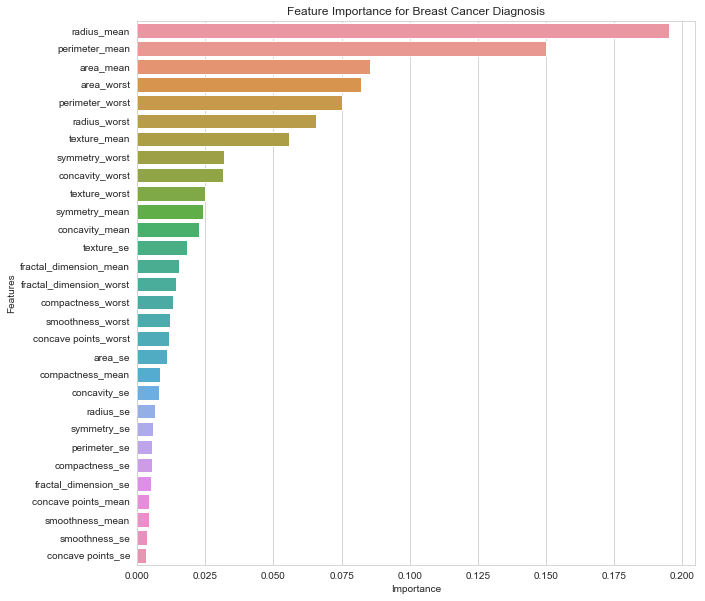

In [30]:
# Create dataframe by zipping RFC feature importances and column names
rfc_features = pd.DataFrame(zip(rfc_best.feature_importances_, df.columns[:-1]), columns = ['Importance', 'Features'])

# Sort in descending order
rfc_features = rfc_features.sort_values(['Importance'], ascending=False)

# Visualize RFC feature importances
fig = plt.figure(figsize=(10,10))
sns.barplot(x = 'Importance', y = 'Features', data = rfc_features, )
plt.title('Feature Importance for Breast Cancer Diagnosis')
sns.set_style("whitegrid")
plt.show()

#### Tree based algorithms like random forest, gradient boosting decision tree and even vanilla decision tree give us useful information about feature importance when we fit the classifier. However we are not entirely sure on the number of features to retain (or feature importance threshold). Recursive feature elimination and Cross Validation selection (RFECV) can help us to quantitatively decide the number of features to retain based on the highest cross validation score we get.

In [31]:
from sklearn.feature_selection import RFECV

clf_lda = LinearDiscriminantAnalysis()
clf_rfc = RandomForestClassifier(**rfc_grid.best_params_, random_state=42)
clf_gbc = GradientBoostingClassifier(**gbc_grid.best_params_, random_state=42)

rfecv_lda = RFECV(clf_lda, step=1, cv=3, scoring='accuracy').fit(X_train_norm, y_train)
rfecv_rfc = RFECV(clf_rfc, step=1, cv=3, scoring='accuracy').fit(X_train_norm, y_train)
rfecv_gbc = RFECV(clf_gbc, step=1, cv=3, scoring='accuracy').fit(X_train_norm, y_train)

print('Optimal number of features for LDA: ', rfecv_lda.n_features_)
print('Best features for LDA: ', X_train.columns[rfecv_lda.support_])
print('\n')
print('Optimal number of features for RFC: ', rfecv_rfc.n_features_)
print('Best features for RFC: ', X_train.columns[rfecv_rfc.support_])
print('\n')
print('Optimal number of features for GBC: ', rfecv_gbc.n_features_)
print('Best features for GBC: ', X_train.columns[rfecv_gbc.support_])

Optimal number of features for LDA:  27
Best features for LDA:  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Optimal number of features for RFC:  7
Best features for RFC:  Index(['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst'],
      dtype='object')


Optimal number of features for GBC:  4
Best features for GBC:  Index(['radius_mean', 'texture_mean', 'area_worst', 'concavity_worst'], 

#### It looks like LDA works best when we use almost all the features where as RFC and GBC perform best when we use reduced features. Let us visualize this analysis by plotting the cross-validation score versus number of features.

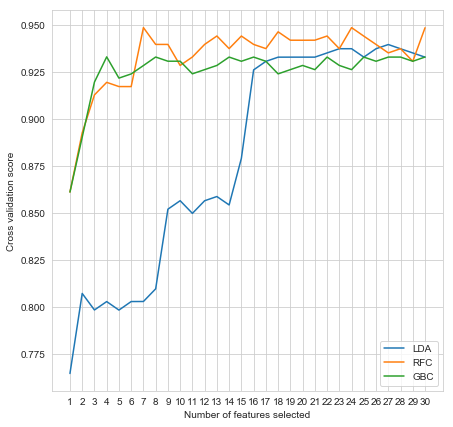

In [32]:
plt.figure(figsize=(7,7))
plt.xlabel('Number of features selected')
plt.xticks(np.arange(1, 31, 1))
plt.ylabel('Cross validation score')
plt.plot(range(1, len(rfecv_lda.grid_scores_) + 1), rfecv_lda.grid_scores_, label='LDA')
plt.plot(range(1, len(rfecv_rfc.grid_scores_) + 1), rfecv_rfc.grid_scores_, label='RFC')
plt.plot(range(1, len(rfecv_gbc.grid_scores_) + 1), rfecv_gbc.grid_scores_, label='GBC')
plt.legend(loc='lower right')
plt.show()

#### From the plot we can see that GBC and RFC perform best with lesser features. Lets ignore LDA for now and take a closer look at the RFC and GBC performances.

In [33]:
gbc_best_features = X_train.columns[rfecv_gbc.support_].tolist()
X_train_gbc_best = pd.DataFrame(X_train_norm, columns=X_train.columns)[gbc_best_features]
X_val_gbc_best = pd.DataFrame(X_val_norm, columns=X_val.columns)[gbc_best_features]

gbc_best_selected = GradientBoostingClassifier(**gbc_grid.best_params_, random_state=42)
gbc_best_selected.fit(X_train_gbc_best, y_train)
gbc_selected_predictions = gbc_best_selected.predict(X_val_gbc_best)
print('Model accuracy on validation data: {}'.format(accuracy_score(y_val, gbc_selected_predictions)))
print('GBC Classification Report')
print(classification_report(y_val, gbc_selected_predictions))

Model accuracy on validation data: 0.9732142857142857
GBC Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.92      1.00      0.96        36

   micro avg       0.97      0.97      0.97       112
   macro avg       0.96      0.98      0.97       112
weighted avg       0.98      0.97      0.97       112



In [34]:
confusion_matrix_gbc_best = pd.DataFrame(confusion_matrix(y_val, gbc_selected_predictions), index = ['Actual Negative','Actual Positive'], columns = ['Predicted Negative','Predicted Postive'] )
confusion_matrix_gbc_best

,Predicted Negative,Predicted Postive
Actual Negative,73,3
Actual Positive,0,36


In [35]:
rfc_best_features = X_train.columns[rfecv_rfc.support_].tolist()
X_train_rfc_best = pd.DataFrame(X_train_norm, columns=X_train.columns)[rfc_best_features]
X_val_rfc_best = pd.DataFrame(X_val_norm, columns=X_val.columns)[rfc_best_features]

rfc_best_selected = RandomForestClassifier(**rfc_grid.best_params_, random_state=42)
rfc_best_selected.fit(X_train_rfc_best, y_train)
rfc_selected_predictions = rfc_best_selected.predict(X_val_rfc_best)
print('Model accuracy on validation data: {}'.format(accuracy_score(y_val, rfc_selected_predictions)))
print('RFC Classification Report')
print(classification_report(y_val, rfc_selected_predictions))

Model accuracy on validation data: 0.9732142857142857
RFC Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.92      1.00      0.96        36

   micro avg       0.97      0.97      0.97       112
   macro avg       0.96      0.98      0.97       112
weighted avg       0.98      0.97      0.97       112



In [36]:
confusion_matrix_rfc_best = pd.DataFrame(confusion_matrix(y_val, rfc_selected_predictions), index = ['Actual Negative','Actual Positive'], columns = ['Predicted Negative','Predicted Postive'] )
confusion_matrix_rfc_best

,Predicted Negative,Predicted Postive
Actual Negative,73,3
Actual Positive,0,36


#### Both GBC and RFC misclassify 3 validation examples. RFC has improved its performance by misclassifying one less example. Since GBC uses only 4 features and maintains the same accuracy, it is the clear beneficiary of feature selection. (RFC uses 7 which isnt bad either)

#### Now, lets try another dimensionality reduction technique - PCA, to see if that can improve the performance.

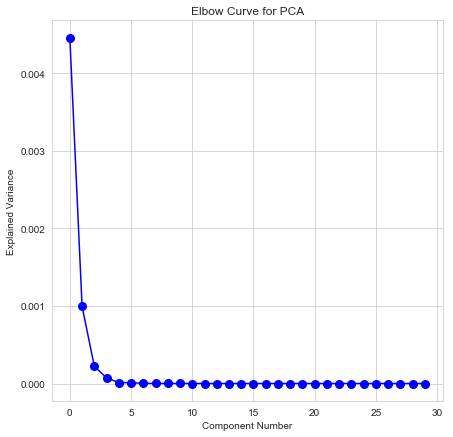

In [37]:
from sklearn.decomposition import PCA

# Instantiate PCA
pca_var = PCA()

# Fit PCA to training data
pca_var.fit(X_train_norm)

# Visualize explained variance with an increasing number of components
fig = plt.figure(figsize=(7,7))
plt.plot(pca_var.explained_variance_, 'bo-', markersize=8)
plt.title("Elbow Curve for PCA")
plt.ylabel('Explained Variance')
plt.xlabel('Component Number')
sns.set_style("whitegrid")
plt.show()

#### Using the elbow method, it looks like 4 PCA components is a sensible choice since the decrease in variability almost drops to zero after 4 components. Lets feed these 4 PCA components to our classifiers and test their performance.

In [38]:
pca = PCA(n_components=4)
pca.fit(X_train_norm)
X_train_norm_pca = pca.transform(X_train_norm)
X_val_norm_pca = pca.transform(X_val_norm)

lda_pca = LinearDiscriminantAnalysis()
rfc_pca = RandomForestClassifier(**rfc_grid.best_params_, random_state=42)
gbc_pca = GradientBoostingClassifier(**gbc_grid.best_params_, random_state=42)

lda_pca.fit(X_train_norm_pca, y_train)
rfc_pca.fit(X_train_norm_pca, y_train)
gbc_pca.fit(X_train_norm_pca, y_train)

print('LDA accuracy on validation data: {}'.format(accuracy_score(y_val, lda_pca.predict(X_val_norm_pca))))
print('RFC accuracy on validation data: {}'.format(accuracy_score(y_val, rfc_pca.predict(X_val_norm_pca))))
print('GBC accuracy on validation data: {}'.format(accuracy_score(y_val, gbc_pca.predict(X_val_norm_pca))))

LDA accuracy on validation data: 0.9732142857142857
RFC accuracy on validation data: 0.9553571428571429
GBC accuracy on validation data: 0.9464285714285714


#### LDA scored an impressive 0.973 on the validation data. Lets take a closer look at the model.

In [39]:
print('LDA_PCA Classification Report')
print(classification_report(y_val, lda_pca.predict(X_val_norm_pca)))

LDA_PCA Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.97      0.94      0.96        36

   micro avg       0.97      0.97      0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



In [40]:
confusion_matrix_lda_pca = pd.DataFrame(confusion_matrix(y_val, lda_pca.predict(X_val_norm_pca)), index = ['Actual Negative','Actual Positive'], columns = ['Predicted Negative','Predicted Postive'] )
confusion_matrix_lda_pca

,Predicted Negative,Predicted Postive
Actual Negative,75,1
Actual Positive,2,34


#### LDA managed to misclassify one example less and has also reduced the dimension of training data from 30 to 4 using PCA. Its a win-win !!!

### Plotting Learning Curves

In [41]:
from sklearn.model_selection import learning_curve, ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

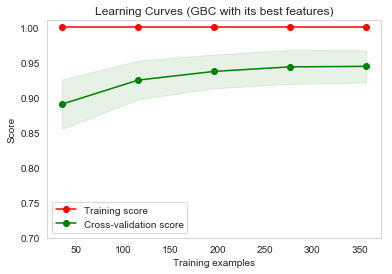

In [42]:
title = "Learning Curves (GBC with its best features)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(gbc_best_selected, title, X_train_gbc_best, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

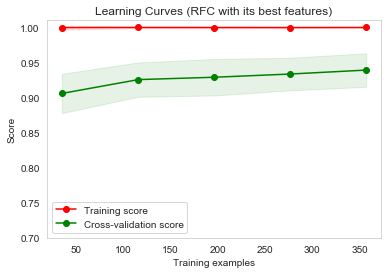

In [43]:
title = "Learning Curves (RFC with its best features)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(rfc_best_selected, title, X_train_rfc_best, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

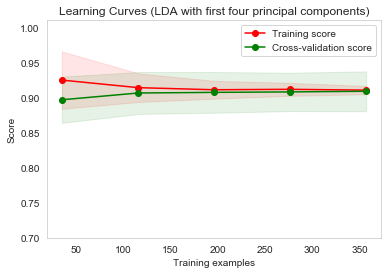

In [44]:
title = "Learning Curves (LDA with first four principal components)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(lda_pca, title, X_train_norm_pca, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

#### Finally, lets make predictions on the test cases stored in 'test-data.csv'.

In [45]:
# load and transform test data

original_df = pd.read_csv('train-data.csv')
original_labels = original_df.tail(10)['diagnosis'].map({'M': 1, 'B': 0})

test_df = pd.read_csv('test-data.csv')
test_df.diagnosis = test_df.diagnosis.map({'M': 1, 'B': 0})
test_df.drop('id', axis=1, inplace=True)
X_test = test_df.iloc[:,:-1]
X_test_norm = norm.transform(X_test)

X_test_norm_pca = pca.transform(X_test_norm)
lda_labels = lda_pca.predict(X_test_norm_pca)

X_test_gbc_best = pd.DataFrame(X_test_norm, columns=X_test.columns)[gbc_best_features]
gbc_labels = gbc_best_selected.predict(X_test_gbc_best)

X_test_rfc_best = pd.DataFrame(X_test_norm, columns=X_test.columns)[rfc_best_features]
rfc_labels = rfc_best_selected.predict(X_test_rfc_best)

predictions = pd.DataFrame({'original':original_labels, 'lda_pca':lda_labels, 'gbc_best':gbc_labels, 'rfc_best':rfc_labels})

display(predictions)
print('Accuracy of LDA_PCA on test set is {}'.format(accuracy_score(original_labels, lda_labels)))
print('Accuracy of GBC_best on test set is {}'.format(accuracy_score(original_labels, gbc_labels)))
print('Accuracy of RFC_best on test set is {}'.format(accuracy_score(original_labels, rfc_labels)))

,original,lda_pca,gbc_best,rfc_best
559,0,0,0,0
560,0,0,0,0
561,0,0,0,0
562,1,0,1,1
563,1,1,1,1
564,1,1,1,1
565,1,1,1,1
566,1,1,1,1
567,1,1,1,1
568,0,0,0,0


Accuracy of LDA_PCA on test set is 0.9
Accuracy of GBC_best on test set is 1.0
Accuracy of RFC_best on test set is 1.0


#### It looks like LDA_PCA misclassified one example in the test set.

### Summary
#### Here are the three best classifiers I trained in this notebook
    Linear Discriminant Analysis(default params)
           features used = first four principal components
           validation accuracy = 0.973
           test accuracy = 0.90 
    Gradient Boosting Classifier(n_estimators=200) 
           features used = ['radius_mean', 'texture_mean', 'area_worst', 'concavity_worst']
           validation accuracy = 0.973
           test accuracy = 1.00
    Random Forest Classifier(n_estimators=100)
           features used = ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst']
           validation accuracy = 0.973
           test accuracy = 1.00